In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [19]:
mean = [0, 0]

cor = 0.4
cov = [[1, cor], [cor, 1]] 

x, y = np.random.multivariate_normal(mean, cov, 1000).T

df = pd.DataFrame({'x': x, 'y':  y})

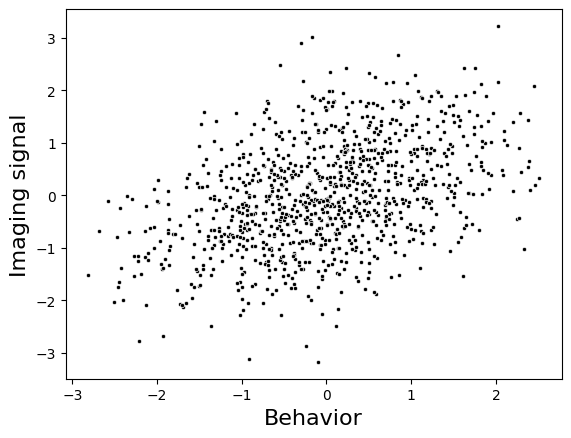

In [20]:
sns.scatterplot(x='x', y='y', data=df, color='k', marker='.')
plt.xlabel('Behavior', fontsize=16)
plt.ylabel('Imaging signal', fontsize=16)
plt.savefig('brain_behavior_scatterplot.png')

/tmp/ipykernel_170858/825400449.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


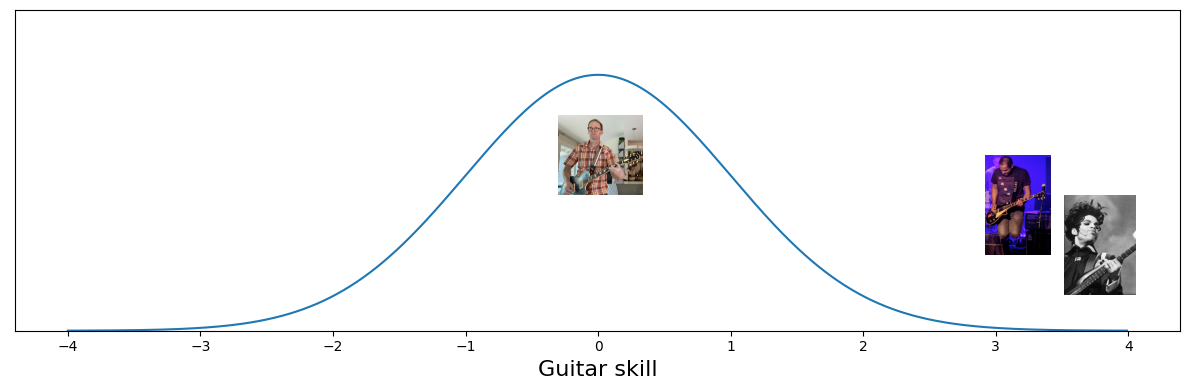

In [83]:
fig = plt.figure(figsize=(12,4))
x = np.arange(-4, 4, .01)
y = norm.pdf(x)
plt.plot(x,y)
plt.ylim([0, .5])
plt.xlabel('Guitar skill', fontsize=16)
ax = plt.gca()
ax.axes.get_yaxis().set_visible(False)

prince = plt.imread('Prince_cropped.jpg') # insert local path of the image.
charan = plt.imread('charan.jpg') # insert local path of the image.
rp = plt.imread('rp_guitar.png') # insert local path of the image.

def show_fig(fig, loc, img):
    newax = fig.add_axes(loc, anchor='NE', zorder=1)
    newax.imshow(img)
    newax.axis('off')

show_fig(fig, [0.7,0.25,0.25,0.25], prince)
show_fig(fig, [0.63,0.35,0.25,0.25], charan)
show_fig(fig, [0.34,0.5,0.2,0.2], rp)
plt.tight_layout()
plt.savefig('guitar_distribution.png')

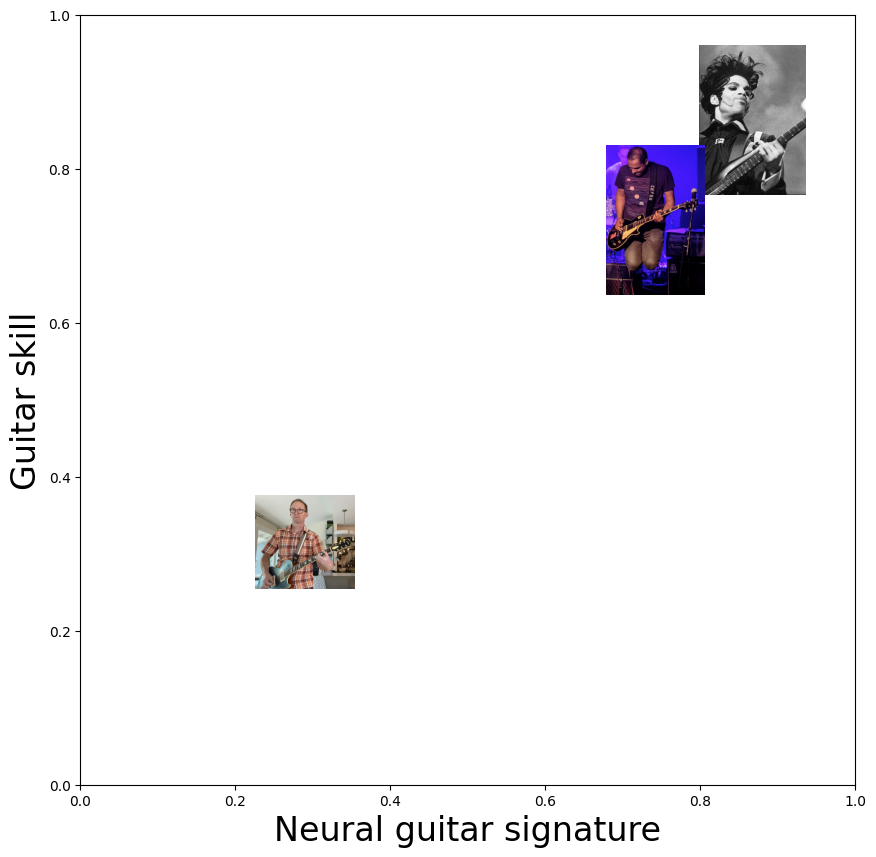

In [86]:
# neural guitar signature

fig = plt.figure(figsize=(10,10))
#x = np.arange(-4, 4, .01)
# y = norm.pdf(x)
# plt.plot(x,y)
plt.ylim([0, 1])
ax = plt.gca()

newax = fig.add_axes([0.7,0.7,0.15,0.15], anchor='NE', zorder=1)
newax.imshow(prince)
newax.axis('off')

newax2 = fig.add_axes([0.6,0.6,0.15,0.15], anchor='NE', zorder=1)
newax2.imshow(charan)
newax2.axis('off')


newax2 = fig.add_axes([0.3,0.3,0.1,0.1], anchor='NE', zorder=1)
newax2.imshow(rp)
newax2.axis('off')

ax.set_ylabel('Guitar skill', fontsize=24)
ax.set_xlabel('Neural guitar signature', fontsize=24)

plt.savefig('ngs.png')

In [100]:
# spike trains from poisson process

dt = 1

window_length = 2000
ntrials = 20

def create_trial(background_rate, stim_rate=None, stim_delta=None, dt=1, window_len=2000):
    """
    
    """
    background_noise = np.random.uniform(size=window_len) < background_rate
    if stim_delta is None:
        stim_resp = np.zeros(window_len)
    else:
        assert stim_rate is not None, 'stim_rate must be specified with stim_delta'
        stim_resp = (np.random.uniform(size=window_len) < stim_rate) * stim_delta
    
    return background_noise + stim_resp

In [101]:
create_trial(.1).mean()

0.1045

In [96]:
window_len=2000
np.random.uniform(window_len)

1621.9465238759649

In [97]:
?np.random.uniform

Docstring:
uniform(low=0.0, high=1.0, size=None)

Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval
``[low, high)`` (includes low, but excludes high).  In other words,
any value within the given interval is equally likely to be drawn
by `uniform`.

.. note::
    New code should use the ``uniform`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
low : float or array_like of floats, optional
    Lower boundary of the output interval.  All values generated will be
    greater than or equal to low.  The default value is 0.
high : float or array_like of floats
    Upper boundary of the output interval.  All values generated will be
    less than or equal to high.  The high limit may be included in the 
    returned array of floats due to floating-point rounding in the 
    equation ``low + (high-low) * random_sample()``.  The default value 
    is 1.0.
size : int or tu